In [1]:
import sys
print(sys.version)
print(sys.version_info)

3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn


In [3]:
#returns a dataframe that includes all the events happened in 'year' since 2009 - 2010
def event_data(year):
    return(pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/PlayByPlay_{}/Events_{}.csv'.format(year,year)))
# Returns a dataframe with variables playerid, teamid and playerName since 2009-2010.
def player_data(year):
    return pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/PlayByPlay_{}/Players_{}.csv'.format(year,year))

In [4]:
df = event_data(2015)
df['new'] = 1
#let's create a table that shows every players statistics and TeamId for a given game.
table = pd.pivot_table(df,fill_value= 0, values= 'new', index=['DayNum', 'EventTeamID','EventPlayerID'],
                     columns=['EventType'], aggfunc = np.sum )

# table_player_2015 gives the total of events for each player in 2015 we have 5442 players' data in this datafram
table_player_2015 = table.groupby('EventPlayerID').apply(lambda x: x[['assist', 'block',
       'foul_pers', 'foul_tech', 'made1_free', 'made2_dunk', 'made2_jump',
       'made2_lay', 'made2_tip', 'made3_jump', 'miss1_free', 'miss2_dunk',
       'miss2_jump', 'miss2_lay', 'miss2_tip', 'miss3_jump', 'reb_dead',
       'reb_def', 'reb_off', 'steal', 'sub_in', 'sub_out', 'timeout',
       'timeout_tv', 'turnover']].sum() )
table_player_2015.head()


EventType,assist,block,foul_pers,foul_tech,made1_free,made2_dunk,made2_jump,made2_lay,made2_tip,made3_jump,...,miss3_jump,reb_dead,reb_def,reb_off,steal,sub_in,sub_out,timeout,timeout_tv,turnover
EventPlayerID,,,,,,,,,,,,,,,,,,,,,
626432,15,8,31,0,5,0,16,10,1,0,...,2,0,30,17,4,48,56,0,0,23
626433,23,1,75,0,39,0,18,25,1,51,...,64,0,125,38,15,76,89,0,0,34
626434,3,1,24,0,15,0,5,2,0,0,...,1,0,17,3,9,56,51,0,0,9
626435,10,2,21,0,6,0,10,7,0,4,...,8,0,13,4,4,77,61,0,0,9
626436,2,0,3,0,0,0,0,0,0,0,...,1,0,2,1,0,13,3,0,0,1


 ### We will read the datasets and look at their heads 

 __[For detailed explanations of the datasets: Link to Kaggle](https://www.kaggle.com/c/mens-machine-learning-competition-2018/data)__

In [5]:
#This file identifies the different college teams present in the dataset.
teams = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/Teams.csv')
teams.head(3)

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2018
1,1102,Air Force,1985,2018
2,1103,Akron,1985,2018


In [6]:
#This file identifies the different seasons included in the historical data,
#along with certain season-level properties.
seasons = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/Seasons.csv')
seasons.head(3)

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,10/29/1984,East,West,Midwest,Southeast
1,1986,10/28/1985,East,Midwest,Southeast,West
2,1987,10/27/1986,East,Southeast,Midwest,West


In [7]:
# This file identifies the seeds for all teams in each NCAA® tournament, for all seasons of historical data.
seeds = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/NCAATourneySeeds.csv')
seeds.head(3)

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228


In [23]:
#This file identifies the game-by-game results for many seasons of historical data, starting with the 1985 season
reg_season_cpt = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/RegularSeasonCompactResults.csv')
reg_season_cpt.head(3).columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT'],
      dtype='object')

In [8]:
#This file identifies the game-by-game NCAA® tournament results for all seasons of historical data.
tour_results = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/NCAATourneyCompactResults.csv')
tour_results.head(3)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0


In [9]:
#This file provides team-level box scores for many regular seasons of historical data, starting with the 2003 season. 
seas_detail = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/RegularSeasonDetailedResults.csv')
#seas_detail.columns
seas_detail.head(3)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23


In [10]:
#This file provides team-level box scores for many NCAA® tournaments, starting with the 2003 season.
tour_detail = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/NCAATourneyDetailedResults.csv')
tour_detail.head(3)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18


In [11]:
#This file indicates the Division I conferences that have existed over the years since 1985.
conferences = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/Conferences.csv')
conferences.head(3)

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference


In [12]:
#This file indicates the conference affiliations for each team during each season. 
#Some conferences have changed their names from year to year, and/or changed which teams are part of the conference.
#This file tracks this information historically.
team_conferences = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/TeamConferences.csv')
team_conferences.head(3)

,Season,TeamID,ConfAbbrev
0,1985,1114,a_sun
1,1985,1147,a_sun
2,1985,1204,a_sun


In [13]:
#This file indicates the head coach for each team in each season, 
#including a start/finish range of DayNums to indicate a mid-season coaching change. 
coaches = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/DataFiles/TeamCoaches.csv')
coaches.head(3)

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson


### Most Succesfull Coach?

In [14]:
# Let's find the coaches changes teams during the season
coaches[(coaches['FirstDayNum'] != 0)|(coaches['LastDayNum'] != 154)];

In [15]:
# Let's see the coaches and the number of teams they worked for.
coaches.groupby(['CoachName']).TeamID.unique(); # this will give the list of teams for each coach and the teams they have worked.
coaches.groupby(['CoachName', 'TeamID']).Season.count(); # number of seasons a coach worked for a team.

### Most Succesfull Teams? By Number of Champs

In [16]:
champ_count = tour_results[tour_results['DayNum'] == 154].WTeamID.value_counts()

champ_teams = teams[teams.TeamID.isin(list(champ_count.index))][['TeamID','TeamName']]
champ_teams['no_champs'] = champ_teams.TeamID.map(champ_count)
Champ_Teams = champ_teams.sort_values(by = 'no_champs', ascending = False)


### Most Succesfull Teams? By Average seed:

In [17]:
def TeamID_to_Tname(series_TeamID):
    series_teamname = teams.set_index('TeamName').TeamID.map(series_TeamID).sort_values(ascending = False)
    return series_teamname
def PlayerID_to_TeamID(list_PlayerID, season):
    team_player = pd.read_csv('/Users/user/Desktop/proje/EGMStudyGroup/NCAA/data/PlayByPlay_{}/Players_{}.csv'.format(season,season))
    teamID = team_player[team_player.isin(list_PlayerID)]
    return teamID

In [18]:
seeds['Seed'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
seeds['Seed_Numeric'] = pd.to_numeric(seeds.Seed)
Seed_Means = seeds.groupby('TeamID').Seed_Numeric.mean();

In [19]:
Seeds_Teams = teams[teams.TeamID.isin(list(Seed_Means.index))][['TeamID','TeamName']]
# Seeds_Teams['avg_seeds'] = Seeds_Teams.TeamID.map(Seed_Means)
# Seed_Teams_15 = Seeds_Teams.sort_values(by = 'avg_seeds', ascending = True)[0:16]
# Seed_Teams_15[['TeamName', 'avg_seeds']].plot.bar(x = 'TeamName')



In [20]:
Seed_Best = seeds[seeds['Seed_Numeric']==1].TeamID.value_counts()
Seeds_Best_Teams = teams[teams.TeamID.isin(list(Seed_Best.index))][['TeamID','TeamName']]
Seeds_Best_Teams['No_first_seed'] = Seeds_Best_Teams.TeamID.map(Seed_Best)
Seeds_Best_Teams = Seeds_Best_Teams.sort_values( by = 'No_first_seed', ascending = False)[0:14]



In [21]:
def create_game_stats(events):
    # Day number, winning team id and losing team id uniquely determines the game id
    col = events['DayNum'].astype(str) + "_" + events['WTeamID'].astype(str) + "_" + events['LTeamID'].astype(str)
    events['GameID'] = col
    # new column indicating the winning team
    events.EventTeamID = (events.WTeamID == events.EventTeamID)
    events.EventTeamID = events.EventTeamID.astype(int)

    g = events.groupby(['GameID', 'EventTeamID', 'EventType']).agg({'EventType': 'count'})
    us = g.unstack(['EventTeamID', 'EventType'], fill_value=0)

    return us.sort_index(axis=1)

In [24]:
season_wins = reg_season_cpt['WTeamID']
s1 = season_wins.value_counts()

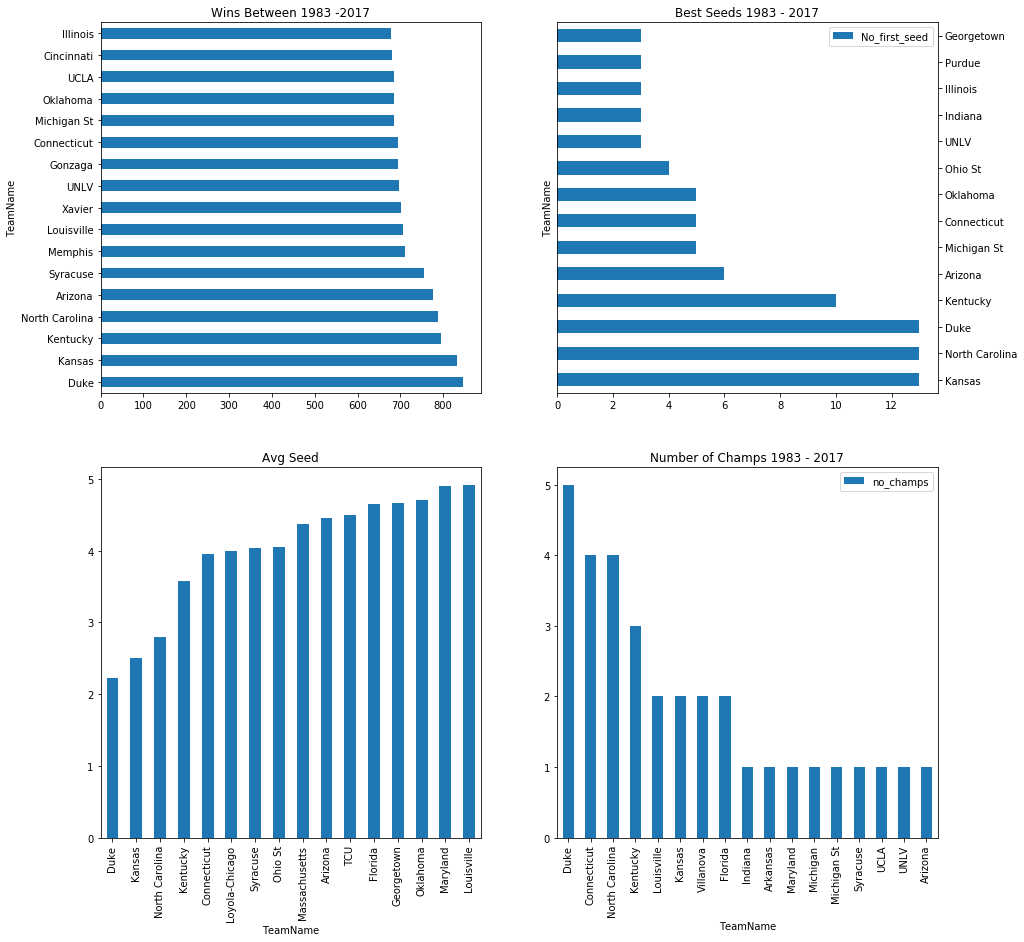

In [32]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

f = fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15,15))
f11 = TeamID_to_Tname(s1)[0:17].plot.barh(ax = ax1)
f11.set_title('Wins Between 1983 -2017')
f12 = Seeds_Best_Teams[['TeamName', 'No_first_seed']].plot.barh(ax = ax2, x = 'TeamName')
f12.yaxis.tick_right()
f12.set_title('Best Seeds 1983 - 2017')
f21 = TeamID_to_Tname(Seed_Means).sort_values(ascending = True)[0:16].plot.bar(ax = ax3, x = 'TeamName')
f21.set_title('Avg Seed')
f22 = Champ_Teams[['no_champs','TeamName']].plot.bar(ax = ax4, x = 'TeamName')
f22.set_title('Number of Champs 1983 - 2017')

# Here we want to predict game result

First we want to write a function that will return our training sets

In [33]:
def create_dataset(stats, matches):
#     """
#     Create dataset from team statistics and match results.
#     In input, each row is the team stats of first team followed by team stats of second team.
#     In output, each row is the result of the corresponding match, with 1 denoting first team win.

#     :param stats: A dataframe of team statistics with total event counts for each team in each row.
#     :param matches: A dataframe of match results with winning team and losing team ids for one match in each row.
#     :return: x, y. Two numpy arrays of stats and match results.
#     """
    num_matches = matches.shape[0]
    feats_per_team = stats.shape[1]

    # allocate space for x and y
    x = np.zeros((num_matches, feats_per_team * 2))
    y = np.zeros(num_matches)

    i = 0
    skipped = 0  # if we can't find a team in stats dataframe, we skip that match.
    for _, row in matches.iterrows():  # loop over matches
        wteam = row.WTeamID
        lteam = row.LTeamID
        try:
            wteam_stats = stats.loc[wteam].values
            lteam_stats = stats.loc[lteam].values
        except KeyError:
            #print("Can't find either {} or {}. Skipping.".format(wteam, lteam))
            skipped += 1
            continue

        # pick a random order for winning/losing teams.
        if np.random.rand() > 0.5:
            x[i, 0:feats_per_team] = wteam_stats
            x[i, feats_per_team:] = lteam_stats
            y[i] = 1
        else:
            x[i, 0:feats_per_team] = lteam_stats
            x[i, feats_per_team:] = wteam_stats
            y[i] = 0
        i += 1

    # if we skipped some matches, x and y has extra empty rows. do not return these.
    x = x[0:(num_matches-skipped)]
    y = y[0:(num_matches-skipped)]
    return x, y

We will read the datasets and manipulate them in such a form that we can feed the previous function

In [34]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
stats_season = 2017
predict_season = 2017

# load precalculated stats from disk
# team_stats = pd.read_csv('data/TeamStats_2010.csv', index_col=0, header=[0, 1])



In [35]:
# get stats for each team in 2017 season
events = pd.read_csv('data/PlayByPlay_{}/Events_{}.csv'.format(stats_season, stats_season))
team_stats = events[events['DayNum'] < 134].groupby(['EventTeamID', 'EventType']).agg({'EventType': 'count'})
team_stats = team_stats.unstack('EventType')
team_stats.fillna(0, inplace=True)
team_stats.head()

EventType                                                   \
EventType      assist  block foul_pers foul_tech made1_free made2_dunk   
EventTeamID                                                              
1101            340.0   69.0     554.0       2.0      298.0       22.0   
1102            449.0   55.0     555.0       2.0      470.0       14.0   
1103            479.0  103.0     602.0      17.0      463.0       44.0   
1104            377.0  139.0     650.0       2.0      480.0       93.0   
1105            263.0   44.0     439.0       3.0      342.0       29.0   

                                                        ...                \
EventType   made2_jump made2_lay made2_tip made3_jump   ...    miss3_jump   
EventTeamID                                             ...                 
1101             165.0     239.0       8.0      177.0   ...         300.0   
1102             210.0     277.0       4.0      246.0   ...         432.0   
1103              95.0     386.0       9.0      333.0   ...         567.0   
1104             178.0     273.0      22.0      218.0   ...         468.0   
1105             147.0     227.0      11.0      111.0   ...         282.0   

                                                                     \
EventType   reb_dead reb_def reb_off  steal  sub_in sub_out timeout   
EventTeamID                                                           
1101            72.0   572.0   189.0  175.0   887.0   884.0    76.0   
1102            84.0   782.0   293.0  183.0   981.0   982.0    84.0   
1103           113.0   810.0   322.0  179.0  1080.0  1082.0    65.0   
1104           127.0   887.0   406.0  198.0  1131.0  1177.0    95.0   
1105            93.0   543.0   257.0   90.0   559.0   560.0    46.0   

                                 
EventType   timeout_tv turnover  
EventTeamID                      
1101              77.0    362.0  
1102             130.0    386.0  
1103             133.0    384.0  
1104             119.0    458.0  
1105              72.0    317.0  

[5 rows x 25 columns]

In [36]:
# get match results for 2017 season
season_results = pd.read_csv('data/RegularSeasonCompactResults.csv')
season_results = season_results[season_results.Season == predict_season]

ncaa_results = pd.read_csv('data/NCAATourneyCompactResults.csv')
ncaa_results = ncaa_results[ncaa_results.Season == predict_season]
ncaa_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
2050,2017,134,1243,95,1448,88,N,0
2051,2017,134,1291,67,1309,66,N,0
2052,2017,135,1413,67,1300,63,N,0
2053,2017,135,1425,75,1344,71,N,0
2054,2017,136,1112,100,1315,82,N,0


We will call the create_dataset function with ncaa_results as matches and team_stats as stats

In [37]:
test_x, test_y = create_dataset(team_stats, ncaa_results)
train_x, train_y = create_dataset(team_stats, season_results)

In [38]:
# Let's double check whether our datasets are in appropriate forms
shapes_of_data = (test_x.shape , test_y.shape, train_x.shape, train_y.shape )
shapes_of_data

((67, 50), (67,), (5395, 50), (5395,))

In [39]:
# Let's see how KNN- algorithm predict the results: K = 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x, train_y)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(train_x, train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(test_x, test_y)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.64


In [40]:
# Let's see how KNN - algorithm with normalization predict the results: K = 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, train_y)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, test_y)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.64


Confusion matrix, without normalization
[[23 14]
 [10 20]]
Normalized confusion matrix
[[ 0.62  0.38]
 [ 0.33  0.67]]


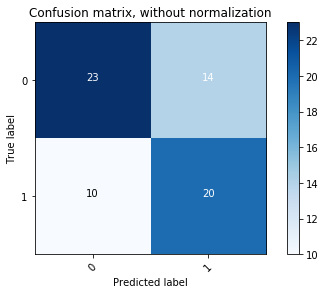

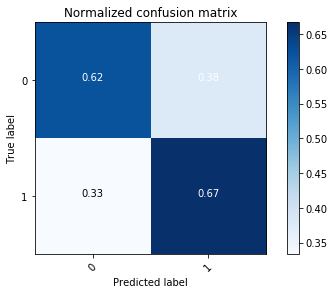

In [41]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, train_y)
y_pred = knn.fit(X_train_scaled, train_y).predict(X_test_scaled)
class_names = [0,1]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [42]:
# Let's see how KNN- algorithm predict the results: K = 4
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train_scaled, train_y)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, test_y)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.55


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
X_train_normalized = preprocessing.normalize(train_x, norm='l2')
X_test_normalized = preprocessing.normalize(test_x, norm='l2')
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_normalized, train_y)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_normalized, train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_normalized, test_y)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.63


In [44]:
# Let's see how KNN- algorithm predict the results: K = 2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_scaled, train_y)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, train_y)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, test_y)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.61


In [45]:
# Now we will use logistic regression to predict game
#results for 2010 NCAA results from regular season data 2010
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(train_x, train_y)
test_acc = clf.score(test_x, test_y)
training_acc = clf.score(train_x , train_y)
print("Test accuracy: {}".format(test_acc))
print("Training accuracy: {}".format(training_acc))

Test accuracy: 0.6417910447761194
Training accuracy: 0.7316033364226135


In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty= 'l1', C = .01, max_iter= 4000, solver = 'saga')
clf.fit(train_x, train_y)
test_acc = clf.score(test_x, test_y)
training_acc = clf.score(train_x , train_y)
print("Test accuracy : {}".format(test_acc))
print("Training accuracy : {}".format(training_acc))

Test accuracy : 0.6268656716417911
Training accuracy : 0.7310472659870251


In [47]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty= 'l2', C = 1, max_iter= 4000, solver = 'sag')
clf.fit(train_x, train_y)
test_acc = clf.score(test_x, test_y)
training_acc = clf.score(train_x , train_y)
print("Test accuracy : {}".format(test_acc))
print("Training accuracy : {}".format(training_acc))

Test accuracy : 0.6417910447761194
Training accuracy : 0.7312326227988879


In [48]:
# Now we will use logistic regression with l1 penalty and various C values 
# to predict game results for 2010 NCAA results
from sklearn.linear_model import LogisticRegression
for param in list(np.linspace(1,100,5)):
    clf = LogisticRegression(penalty= 'l1', C = param, max_iter= 700, solver = 'saga')
    clf.fit(train_x, train_y)
    test_acc = clf.score(test_x, test_y)
    training_acc = clf.score(train_x , train_y)
    print("Test accuracy C = {: .2f}: {}".format(param,test_acc))
    print("Training accuracy C = {: .2f}: {}".format(param, training_acc))
# The same result without penalty

/Users/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy C =  1.00: 0.6417910447761194
Training accuracy C =  1.00: 0.7306765523632993
Test accuracy C =  25.75: 0.6417910447761194
Training accuracy C =  25.75: 0.7306765523632993
Test accuracy C =  50.50: 0.6417910447761194
Training accuracy C =  50.50: 0.7306765523632993
Test accuracy C =  75.25: 0.6417910447761194
Training accuracy C =  75.25: 0.7306765523632993
Test accuracy C =  100.00: 0.6417910447761194
Training accuracy C =  100.00: 0.7306765523632993


In [49]:
# Now we will use logistic regression with l2 penalty with various C
# to predict game results for 2010 NCAA results
from sklearn.linear_model import LogisticRegression
for param in np.linspace(1,100,10):
    clf = LogisticRegression(penalty= 'l2', C = param, max_iter= 1000, solver= 'newton-cg')
    clf.fit(train_x, train_y)
    test_acc = clf.score(test_x, test_y)
    training_acc = clf.score(train_x , train_y)
    print("Test accuracy for C = {}: {}".format(param, test_acc))
    print("Training accuracy for C = {} : {}".format(param, training_acc))
# The same result without penalty

Test accuracy for C = 1.0: 0.6417910447761194
Training accuracy for C = 1.0 : 0.7330861909175163
Test accuracy for C = 12.0: 0.6417910447761194
Training accuracy for C = 12.0 : 0.7330861909175163
Test accuracy for C = 23.0: 0.6417910447761194
Training accuracy for C = 23.0 : 0.7330861909175163
Test accuracy for C = 34.0: 0.6417910447761194
Training accuracy for C = 34.0 : 0.7330861909175163
Test accuracy for C = 45.0: 0.6417910447761194
Training accuracy for C = 45.0 : 0.7330861909175163
Test accuracy for C = 56.0: 0.6417910447761194
Training accuracy for C = 56.0 : 0.7330861909175163
Test accuracy for C = 67.0: 0.6417910447761194
Training accuracy for C = 67.0 : 0.7330861909175163
Test accuracy for C = 78.0: 0.6417910447761194
Training accuracy for C = 78.0 : 0.7330861909175163
Test accuracy for C = 89.0: 0.6417910447761194
Training accuracy for C = 89.0 : 0.7330861909175163
Test accuracy for C = 100.0: 0.6417910447761194
Training accuracy for C = 100.0 : 0.7330861909175163


In [50]:
# Normalized Logistic Reg. with L2 penalty with various C
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)
for param in list(np.linspace(1,100,10)):
    clf = LogisticRegression(penalty= 'l2', C = param, solver= 'lbfgs' )
    clf.fit(X_train_scaled, train_y)
    test_acc = clf.score(X_test_scaled, test_y)
    training_acc = clf.score(X_train_scaled , train_y)
    print("Test accuracy C = {:.2f} : {}".format(param, test_acc))
    print("Training accuracy C = {:.2f} : {}".format(param, training_acc))

Test accuracy C = 1.00 : 0.6417910447761194
Training accuracy C = 1.00 : 0.7317886932344764
Test accuracy C = 12.00 : 0.6417910447761194
Training accuracy C = 12.00 : 0.7336422613531047
Test accuracy C = 23.00 : 0.6417910447761194
Training accuracy C = 23.00 : 0.7332715477293791
Test accuracy C = 34.00 : 0.6417910447761194
Training accuracy C = 34.00 : 0.7336422613531047
Test accuracy C = 45.00 : 0.6417910447761194
Training accuracy C = 45.00 : 0.7338276181649676
Test accuracy C = 56.00 : 0.6417910447761194
Training accuracy C = 56.00 : 0.7338276181649676
Test accuracy C = 67.00 : 0.6417910447761194
Training accuracy C = 67.00 : 0.7338276181649676
Test accuracy C = 78.00 : 0.6417910447761194
Training accuracy C = 78.00 : 0.7338276181649676
Test accuracy C = 89.00 : 0.6417910447761194
Training accuracy C = 89.00 : 0.7338276181649676
Test accuracy C = 100.00 : 0.6417910447761194
Training accuracy C = 100.00 : 0.7336422613531047


In [51]:
# Normalized Logistic Reg. with L2 penalty with various C
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)
for param in list(np.linspace(1,100,10)):
    clf = LogisticRegression(penalty= 'l2', C = param, solver = 'lbfgs', max_iter=1000 )
    clf.fit(X_train_scaled, train_y)
    test_acc = clf.score(X_test_scaled, test_y)
    training_acc = clf.score(X_train_scaled , train_y)
    print("Test accuracy C = {:.2f} : {}".format(param, test_acc))
    print("Training accuracy C = {:.2f} : {}".format(param, training_acc))


Test accuracy C = 1.00 : 0.6417910447761194
Training accuracy C = 1.00 : 0.7317886932344764
Test accuracy C = 12.00 : 0.6417910447761194
Training accuracy C = 12.00 : 0.7336422613531047
Test accuracy C = 23.00 : 0.6417910447761194
Training accuracy C = 23.00 : 0.7332715477293791
Test accuracy C = 34.00 : 0.6417910447761194
Training accuracy C = 34.00 : 0.7338276181649676
Test accuracy C = 45.00 : 0.6417910447761194
Training accuracy C = 45.00 : 0.7338276181649676
Test accuracy C = 56.00 : 0.6417910447761194
Training accuracy C = 56.00 : 0.7340129749768304
Test accuracy C = 67.00 : 0.6417910447761194
Training accuracy C = 67.00 : 0.7336422613531047
Test accuracy C = 78.00 : 0.6417910447761194
Training accuracy C = 78.00 : 0.7334569045412419
Test accuracy C = 89.00 : 0.6417910447761194
Training accuracy C = 89.00 : 0.7332715477293791
Test accuracy C = 100.00 : 0.6417910447761194
Training accuracy C = 100.00 : 0.7332715477293791


In [52]:
# Normalized Logistic Reg. with L1 penalty with various C
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_x)
X_test_scaled = scaler.transform(test_x)
for param in list(np.linspace(1,100,10)):
    clf = LogisticRegression(penalty= 'l1', C = param)
    clf.fit(X_train_scaled, train_y)
    test_acc = clf.score(X_test_scaled, test_y)
    training_acc = clf.score(X_train_scaled , train_y)
    print("Test accuracy C = {:.2f} : {}".format(param, test_acc))
    print("Training accuracy C = {:.2f} : {}".format(param, training_acc))


Test accuracy C = 1.00 : 0.6268656716417911
Training accuracy C = 1.00 : 0.7314179796107507
Test accuracy C = 12.00 : 0.6417910447761194
Training accuracy C = 12.00 : 0.7329008341056534
Test accuracy C = 23.00 : 0.6417910447761194
Training accuracy C = 23.00 : 0.7334569045412419
Test accuracy C = 34.00 : 0.6417910447761194
Training accuracy C = 34.00 : 0.7334569045412419
Test accuracy C = 45.00 : 0.6417910447761194
Training accuracy C = 45.00 : 0.7338276181649676
Test accuracy C = 56.00 : 0.6417910447761194
Training accuracy C = 56.00 : 0.7338276181649676
Test accuracy C = 67.00 : 0.6417910447761194
Training accuracy C = 67.00 : 0.7338276181649676
Test accuracy C = 78.00 : 0.6417910447761194
Training accuracy C = 78.00 : 0.7338276181649676
Test accuracy C = 89.00 : 0.6417910447761194
Training accuracy C = 89.00 : 0.7338276181649676
Test accuracy C = 100.00 : 0.6417910447761194
Training accuracy C = 100.00 : 0.7338276181649676
